In [49]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
data = 'amazon_cells_labelled.txt'

df = pd.read_csv(data, delimiter= '\\t', header=None)

# 1 = positive, 0 = negative

df.columns = ['review', 'score']

c:\users\conno\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


In [51]:
df.head()

,review,score
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [76]:
pos_kwds = ['good', 'great', 'best' 'amazing', 'excellent', 'incredible', 'fantastic', 'satisfied']

neg_kwds = ['bad', 'awful', 'terrible', 'horrible', 'broken', 'refund', 'worst', 'cheap', 'not', 'dont', 'cant', 'shouldnt', 'wont'] #ugly

In [77]:
# determine if positive
#for key in pos_kwds:

# determine if negative
for key in neg_kwds:
    
    df[str(key)] = df.review.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

In [78]:
df['allcaps'] = df.review.str.isupper()

In [79]:
#df['score'] = (df['score'] == 'score')

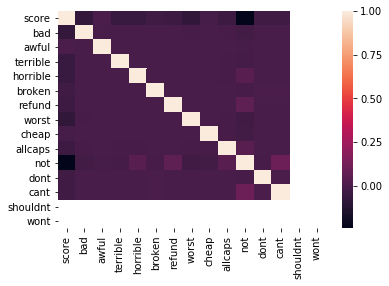

In [80]:
sns.heatmap(df.corr())

In [81]:
df.head()

,review,score,bad,awful,terrible,horrible,broken,refund,worst,cheap,allcaps,not,dont,cant,shouldnt,wont
0,So there is no way for me to plug it in here i...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,"Good case, Excellent value.",True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,Great for the jawbone.,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,Tied to charger for conversations lasting more...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,The mic is great.,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [82]:
# convert to boolean
df['score'] = (df['score'] == 1)

In [83]:
df.head()

,review,score,bad,awful,terrible,horrible,broken,refund,worst,cheap,allcaps,not,dont,cant,shouldnt,wont
0,So there is no way for me to plug it in here i...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,"Good case, Excellent value.",True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,Great for the jawbone.,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,Tied to charger for conversations lasting more...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,The mic is great.,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [87]:
#data = df[pos_kwds + ['allcaps']]
data = df[neg_kwds + ['allcaps']]
target = df['score']

In [88]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 404


The features I added to detect negative reviews were a handful of common negative keywords as well as reviews that were in all caps.